# Exercise 4 – Analysis of UESI Statuses and Nations

Notebook Written By: WDY (Yale-NUS '24) 
(Come say hi at https://www.linkedin.com/in/dys-profile/)

### Introduction

We will be working with a dataset on the UESI (Urban Environment and Social Inclusion Index) 2019 indicators. You can explore the data to learn about the cities (population, area, etc.), and environmental performance: air quality, urban heat island, tree cover, & public transport. Let's read the data into the notebook first. Following that, let's do a quick look through of the dataset to find any interesting information.

In [2]:
uesi <- read.csv("C:/Users/Admin/OneDrive/Documents/Yale-NUS/Quantitative Reasoning/Quantitative Reasoning Repository/Exercise 4 - UESI and Nations/UESI2019_with_indicators.csv")

In [4]:
#EXPLORE THE DATASET
dim(uesi)

[1] 164  21

In [5]:
head(uesi)

city,country,continent,area_total,population_total,popdens,nbhd_num,GDPpc_mean,income_mean,PM25_mean,...,NO2_mean,NO2.UESI,UHI_mean,UHI.UESI,TREECAP_mean,TREECAP.UESI,PUBTRANS_mean,PUBTRANS.UESI,TRANSCOV_mean,TRANSCOV.UESI
addisababa,Ethiopia,Africa,541410030,128864.1,238.01572,10,453.477,NA,24.281163,...,24.412439,34.55,7.9166950,43.17,12810.44750,100.00,2249.9224,45.47,0.31249043,62.42
albuquerque,United States of America,North America,734450908,625314.0,851.40340,142,5217.361,53702.56,5.308103,...,5.042591,89.36,9.7780082,33.65,27.79855,37.88,1036.3594,87.94,0.07977172,19.50
alexandria,United States of America,Africa,40063964,154710.0,3861.57498,38,25056.731,110522.11,9.795662,...,9.526250,73.45,0.8685613,73.93,154.48229,99.85,396.5191,100.00,0.55386030,72.83
alger,Algeria,Africa,772064075,2988144.0,3870.33162,57,1063.223,NA,11.792896,...,11.393151,67.12,3.2955711,62.31,33.34392,89.48,827.0654,90.78,0.46926103,80.78
amsterdam,Netherlands,Europe,173710231,844952.0,4864.14643,99,15927.979,25601.08,10.854443,...,11.825109,65.48,-6.3664493,96.81,373.54904,97.83,278.2310,100.00,0.89732504,95.34
anchorage,United States of America,North America,4465752290,298225.0,66.78046,55,1853.131,86196.62,3.411778,...,3.290649,92.75,-15.2162612,100.00,7088.97685,100.00,3120.4703,68.09,0.04651749,11.95


In [6]:
str(uesi)

'data.frame':	164 obs. of  21 variables:
 $ city            : Factor w/ 164 levels "addisababa","albuquerque",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ country         : Factor w/ 85 levels "Afghanistan",..: 24 81 81 2 47 81 54 27 81 81 ...
 $ continent       : Factor w/ 6 levels "Africa","Asia",..: 1 4 1 1 3 4 6 3 4 4 ...
 $ area_total      : num  5.41e+08 7.34e+08 4.01e+07 7.72e+08 1.74e+08 ...
 $ population_total: num  128864 625314 154710 2988144 844952 ...
 $ popdens         : num  238 851 3862 3870 4864 ...
 $ nbhd_num        : int  10 142 38 57 99 55 68 7 135 200 ...
 $ GDPpc_mean      : num  453 5217 25057 1063 15928 ...
 $ income_mean     : num  NA 53703 110522 NA 25601 ...
 $ PM25_mean       : num  24.28 5.31 9.8 11.79 10.85 ...
 $ PM25.UESI       : num  18.4 100 97.8 75.8 84.7 ...
 $ NO2_mean        : num  24.41 5.04 9.53 11.39 11.83 ...
 $ NO2.UESI        : num  34.5 89.4 73.5 67.1 65.5 ...
 $ UHI_mean        : num  7.917 9.778 0.869 3.296 -6.366 ...
 $ UHI.UESI        : num  43.2 33

In [7]:
table(uesi$continent)


       Africa          Asia        Europe North America       Oceania 
           24            33            37            47            10 
South America 
           13 

In [8]:
unique(uesi$country)

[1] Ethiopia                              United States of America             
 [3] Algeria                               Netherlands                          
 [5] Paraguay                              Greece                               
 [7] Mali                                  India                                
 [9] Thailand                              Spain                                
[11] China                                 Germany                              
[13] Columbia                              Slovakia                             
[15] Australia                             Belgium                              
[17] Romania                               Hungary                              
[19] Argentina                             Venezuela                            
[21] Morocco                               Russia                               
[23] Guatemala                             Panama                               
[25] Portugal                              Guinea                               
[27] Denmark                               Senegal                              
[29] Tanzania                              Republic of Ireland                  
[31] Scotland                              Brazil                               
[33] Sierra Leone                          Zimbabwe                             
[35] Viet Nam                              Chinese special administrative region
[37] Turkey                                Indonesia                            
[39] South Africa                          Afghanistan                          
[41] Uganda                                Ukraine                              
[43] Rwanda                                Democratic Republic of Congo         
[45] Nigeria                               Peru                                 
[47] Togo                                  United Kingdom                       
[49] Angola                                France                               
[51] Nicaragua                             Philippines                          
[53] Mozambique                            Colombia                             
[55] Mexico                                Italy                                
[57] Liberia                               Uruguay                              
[59] Canada                                Kenya                                
[61] Niger                                 Mauritania                           
[63] Norway                                Cambodia                             
[65] Ecuador                               Iceland                              
[67] Costa Rica                            El Salvador                          
[69] Chile                                 Dominican Republic                   
[71] South Korea                           Singapore                            
[73] Sweden                                Iran                                 
[75] Israel                                Japan                                
[77] Tunisia                               Austria                              
[79] Laos                                  Poland                               
[81] New Zealand                           Myanmar                              
[83] Cameroon                              Croatia                              
[85] Switzerland                          
85 Levels: Afghanistan Algeria Angola Argentina Australia Austria ... Zimbabwe

## Step 1: Pick 1 indicator and create a table to explore how many missing values there are for that indicator

In [11]:
# The indicator here is income mean

table(is.na(uesi$income_mean))


FALSE  TRUE 
   91    73 

In this case, there are 73 NA values and 91 non NA values.

## Step 2: What is the mean/median income of cities that score a 100 on Tree Cover per capita?

In [14]:
mean(uesi$income_mean[uesi$TREECAP.UESI == 100], na.rm = TRUE)

[1] 79005.61

In [15]:
median(uesi$income_mean[uesi$TREECAP.UESI == 100], na.rm = TRUE)

[1] 52792.98

## Step 3: What is the IQR/SD of all cities' income?

In [19]:
IQR(uesi$income_mean, na.rm = TRUE)

# OR USING QUANTILES

Q1 <- quantile(uesi$income_mean, 0.25, na.rm = TRUE)
Q3 <- quantile(uesi$income_mean, 0.75, na.rm = TRUE)
Q3-Q1

[1] 35912.33

75% 
35912.33

In [20]:
sd(uesi$income_mean, na.rm = TRUE)

[1] 5996657

## Step 4: What is the total population of cities not in Asia?

In [23]:
total_population <- sum(uesi$population_total[!uesi$continent == "Asia"])
total_population 

[1] 255690791

## Step 5: How many cities have more than 100 neighbourhoods?

In [26]:
number_cities <- sum(uesi$nbhd_num > 100)
number_cities

# ALTERNATIVELY, LENGTH CAN BE USED

number_cities <- length(uesi$city[uesi$nbhd_num > 100])

[1] 42

## Step 6: Which cities have scores above 85 on both PUBTRANS.UESI AND TREECAP.UESI

In [29]:
uesi$city[which(uesi$PUBTRANS.UESI > 85 & uesi$TREECAP.UESI > 85)]

# IMPORTANT TO NOTE HERE. WHICH() IS USED HERE. which() is used when 2 conditions are present in subsetting.

[1] alexandria      alger           amsterdam       asuncion       
 [5] atlanta         baltimore       berlin          boston         
 [9] bratislava      bridgeport      brisbane        brussels       
[13] bucharest       budapest        chelyabinsk     chicago        
[17] cleveland       copenhagen      denver          detroit        
[21] dublin          edinburgh       fargo           hamburg        
[25] houston         kampala         kiev            lome           
[29] london          louisville      lyons           managua        
[33] maputo          melbourne       milan           milwaukee      
[37] minneapolis     monrovia        montreal        moscow         
[41] munich          nashville       newyork         nizhny         
[45] novosibirsk     omaha           oslo            paterson       
[49] philadelphia    portland        quito           riodejaneiro   
[53] saintpetersburg saltlakecity    sanjose         seattle        
[57] seoul           singapore       stlouis         stockholm      
[61] sydney          toronto         tulsa           vancouver      
[65] vienna          warsaw          wellington      wichita        
[69] yangon          zagreb          zurich         
164 Levels: addisababa albuquerque alexandria alger amsterdam ... zurich

## Step 7: How many cities get perfect scores of 100 on all of the 3 variables PM25. UHI AND TREECAP.UESI?

After completing this, you may want to find which 2 cities they are.

In [31]:
table(uesi$PM25.UESI == 100 & uesi$UHI.UESI == 100 & uesi$TREECAP.UESI == 100)


FALSE  TRUE 
  162     2 

In [33]:
uesi$city[which(uesi$PM25.UESI == 100 & uesi$UHI.UESI == 100 & uesi$TREECAP.UESI == 100)]

[1] anchorage oslo     
164 Levels: addisababa albuquerque alexandria alger amsterdam ... zurich

## Step 8: How many cities are better than Singapore with respect to BOTH and OR tree cover (variable identifier TREECAP) and PM2.5 (variable identifier PM25)?

In [40]:
# For BOTH
sum((uesi$TREECAP.UESI > uesi$TREECAP.UESI[uesi$city == "singapore"]) & 
    (uesi$PM25.UESI > uesi$PM25.UESI[uesi$city == "singapore"]))

# For OR
sum(uesi$TREECAP.UESI > uesi$TREECAP.UESI[uesi$city == "singapore"] | 
    uesi$PM25.UESI > uesi$PM25.UESI[uesi$city == "singapore"], na.rm = TRUE)

[1] 82

[1] 145

## Step 9: Draw a histogram of PM25 for all cities

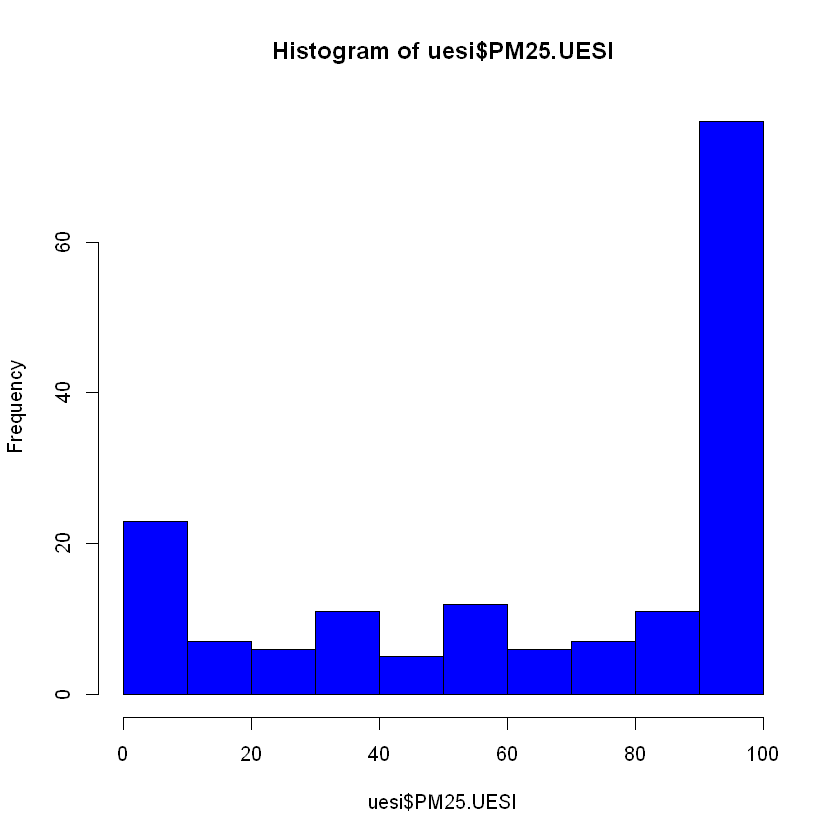

In [42]:
hist(uesi$PM25.UESI,
    col = "blue")

## Step 10: How do cities across continents compare on the PM25 UESI indicator?

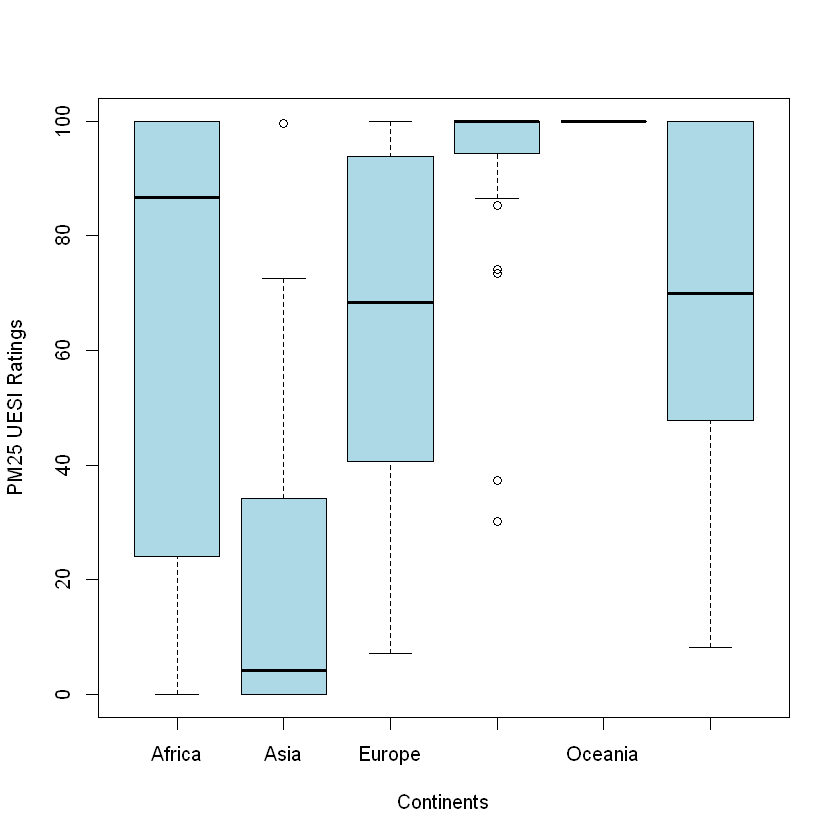

In [45]:
# Use a boxplot here to determine

boxplot(uesi$PM25.UESI ~ uesi$continent,
       col = "lightblue",
       ylab = "PM25 UESI Ratings",
       xlab = "Continents")